# Notebook imports and packages

In [2]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff

from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function
## $$ f(x) = x^2 + x + 1$$

In [4]:
def f(x):
    return x**2 + x + 1

In [5]:
# make date
x_1 = np.linspace(start=-3, stop=3, num=100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

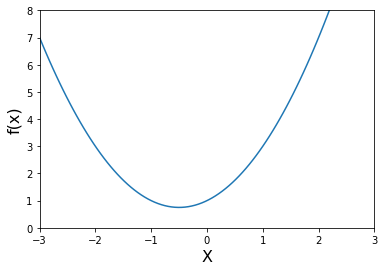

In [6]:
# plot
plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Creating a python function for the derivate f(x) callef df(x)

In [7]:
import sympy as sym

In [8]:
def df(x):
    return 2*x + 1

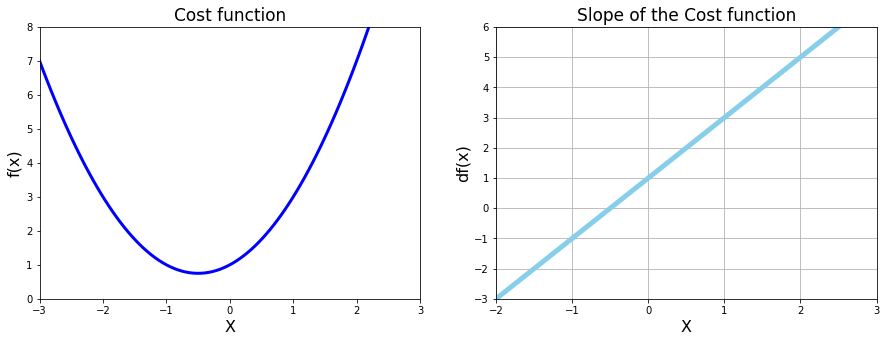

In [9]:
# plot function and derivate side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color= 'blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.xlim([-2, 3])
plt.ylim([-3, 6])

plt.plot(x_1, df(x_1), color= 'skyblue', linewidth=5)


plt.show()

# Python Loops & Gradient Descent

In [10]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope r df(x) value at this point is', df(new_x))
print('f(x) value or cost at this point is', f(new_x))


Loop ran this many times: 40
Local minimum occurs at: -0.49962781616118024
Slope r df(x) value at this point is 0.0007443676776395236
f(x) value or cost at this point is 0.7500001385208099


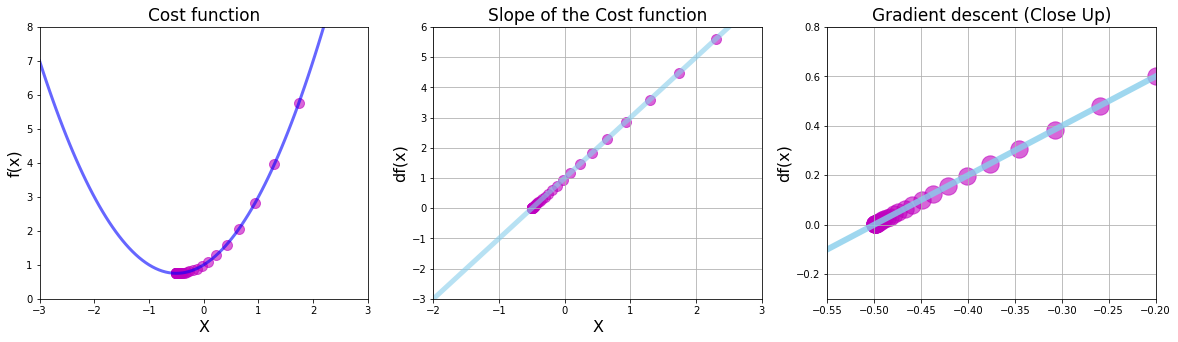

In [11]:
# Super impose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color= 'blue', linewidth=3, alpha=0.6)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='m', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.xlim([-2, 3])
plt.ylim([-3, 6])

plt.plot(x_1, df(x_1), color= 'skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='m', s=100, alpha=0.6)

# 3 Chart: Derivative (close up)
plt.subplot(1, 3, 3)

plt.title('Gradient descent (Close Up)', fontsize=17)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.xlim([-0.55, -0.2])
plt.ylim([-0.3, 0.8])

plt.plot(x_1, df(x_1), color= 'skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='m', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [12]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

# Writing the g(x) function and the dg(x)
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

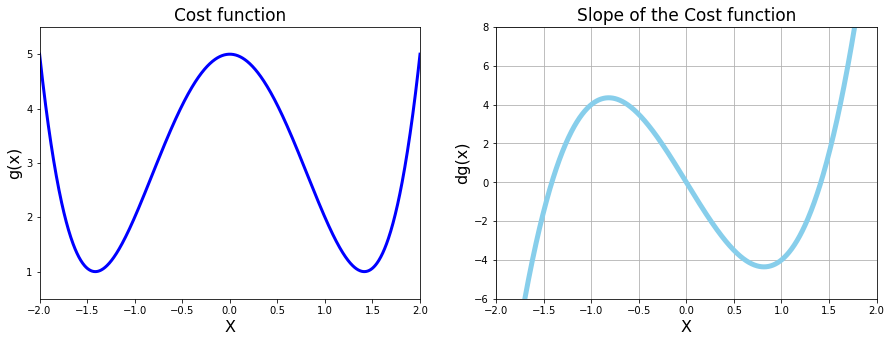

In [13]:
# plot function and derivate side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color= 'blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-6, 8])

plt.plot(x_2, dg(x_2), color= 'skyblue', linewidth=5)


plt.show()

## Gradient Descent as a Python Function

In [14]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):   
    new_x = initial_guess  
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    
    for n in range (max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = new_x - multiplier * gradient
        
        step_size = abs(new_x - previous_x)  
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        if step_size < precision:
            break
            
    return new_x, x_list, slope_list

In [15]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  1.4122375085019094
Number of steps:  23


In [16]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5, multiplier=0.01, precision=0.0001)
print('Local min occurs at: ', local_min)
print('Number of steps: ',len(list_x))

Local min occurs at:  -1.4137636556157256
Number of steps:  56


In [17]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at: ', local_min)
print('Number of steps: ',len(list_x))

Local min occurs at:  -1.4120887490901561
Number of steps:  34


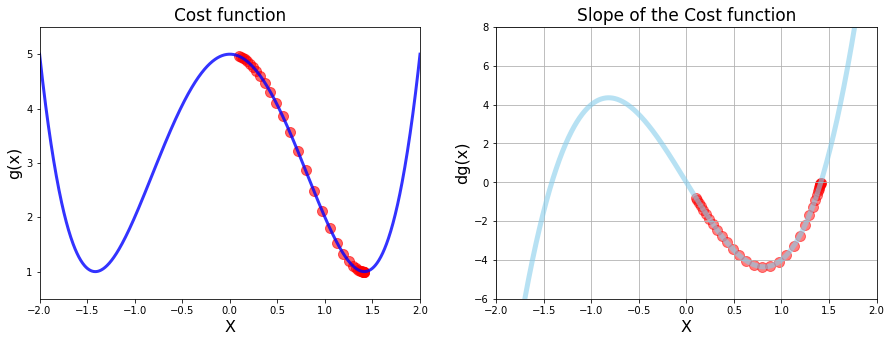

In [18]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0.1)

# plot function and derivate and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color= 'blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-6, 8])

plt.plot(x_2, dg(x_2), color= 'skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)


plt.show()

In [19]:
print(len(deriv_list))
print(len(list_x))


34
34


# Example 3 - Divergence, Overflow and Python Tuples
## $$h(x) = x^5 - 2x^4 + 2$$

In [20]:
# Make data 
x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

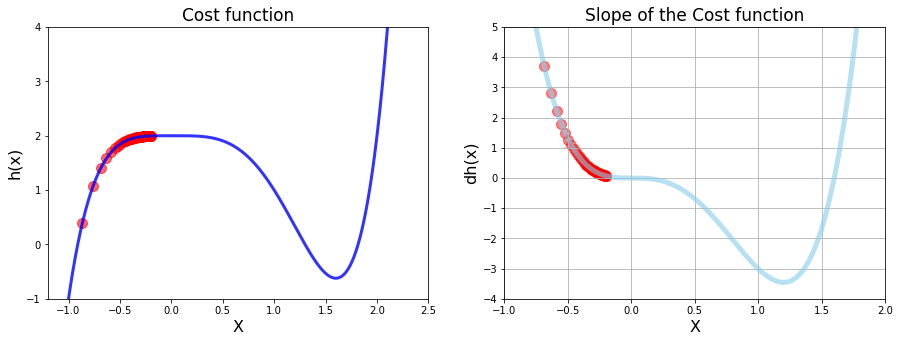

Local min occurs at:  -2071072.4470816324
Cost at this minimum is:  -3.810455326061589e+31
Number of steps:  71


In [21]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= -0.2, max_iter=70)

# plot function and derivate and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-1.2, 2.5])
plt.ylim([-1, 4])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color= 'blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim([-1, 2])
plt.ylim([-4, 5])

plt.plot(x_3, dh(x_3), color= 'skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)


plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ',len(list_x))

In [22]:
import sys
# help(sys) -sys documentation
# sys.version
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [23]:
# Creating a tuple - Tuple packing
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_membrs = 13, 4, 9, 26, 17

# How to access a value in a tuple
print('I loooveee', breakfast[0])
print('My hotel has no ' + str(unlucky_membrs[1]) + 'th floor')

not_my_address = 1, 'infinite loop', 'Cupertino', 95014

tuple_with_sngle_value = 42,
print(tuple_with_sngle_value)

main, side, greens = breakfast
print('Main course is ', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is: ', data_tuple[0])
print('Cost at the x last value is ', h(data_tuple[0]))
print('Number of steps is ', len(data_tuple[1]))

I loooveee bacon
My hotel has no 4th floor
(42,)
Main course is  bacon
Local min is:  1.5989534547394717
Cost at the x last value is  -0.6214287992331258
Number of steps is  117


## The Learning Rate

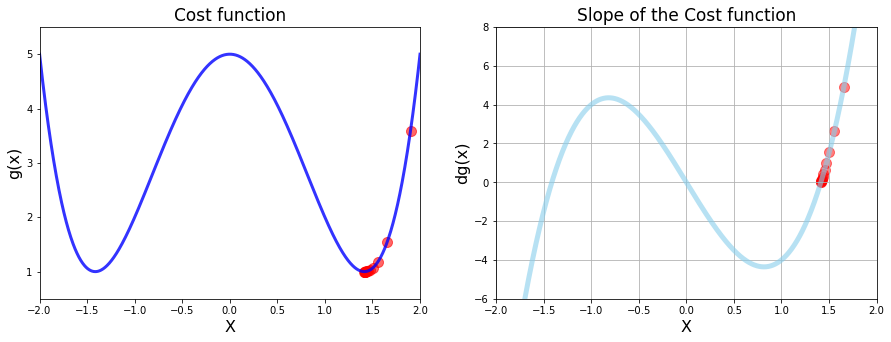

Number of steps is:  14


In [24]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9, multiplier = 0.02, max_iter=500)

# plot function and derivate and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color= 'blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-6, 8])

plt.plot(x_2, dg(x_2), color= 'skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)


plt.show()
print('Number of steps is: ', len(list_x))

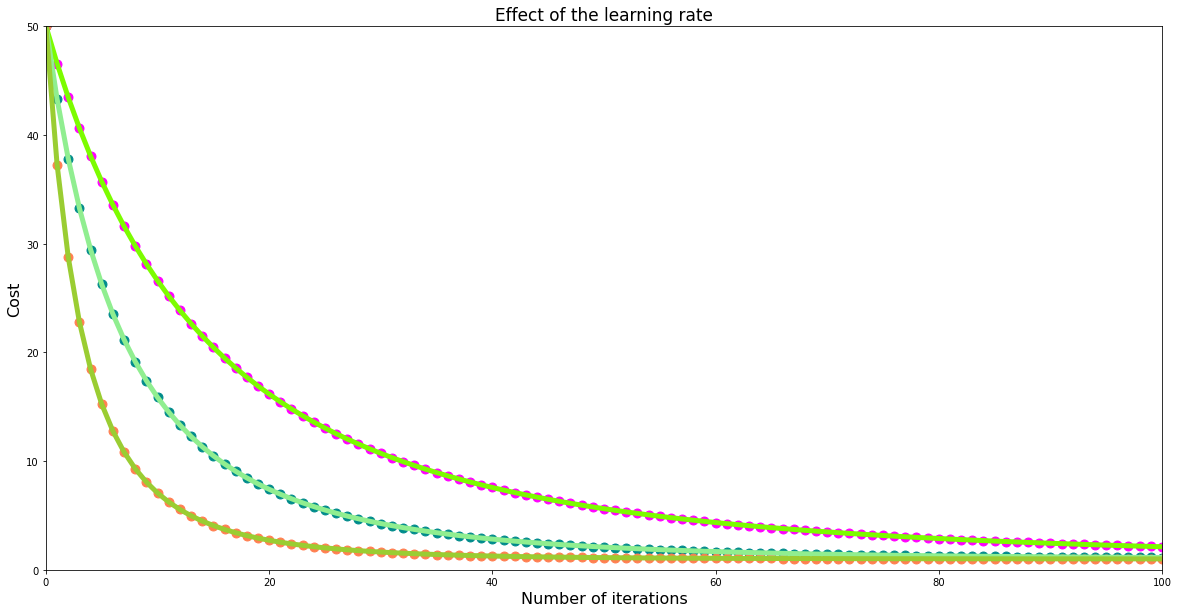

In [25]:
# Run Gradient Descent 3 times
n = 100

low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3, multiplier = 0.0005,
                                                 precision=0.0001, max_iter=n)

# Plotting two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3, multiplier = 0.001,
                                                 precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3, multiplier = 0.002,
                                                 precision=0.0001, max_iter=n)
# Experiment
# insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 3, multiplier = 0.25,
                                                 #precision=0.0001, max_iter=n)

# Values for our chart
# 1) Y Axis Data: Convert the list to Numpy Arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
#insane_values = np.array(insane_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim([0, n])
plt.ylim([0, 50])

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Number of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color= 'lawngreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='magenta', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color= 'lightgreen', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='darkcyan', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(high_values), color= 'yellowgreen', linewidth=5)
plt.scatter(iteration_list, g(high_values), color='coral', s=80)

# Plotting insane learning rate
#plt.plot(iteration_list, g(insane_values), color= 'red', linewidth=5)
#plt.scatter(iteration_list, g(insane_values), color='red', s=80)

plt.show()


# Example 4 - Data Visualization with 3D Charts

## Minimise $$f(x, y) = \frac {1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [26]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [27]:
# ,ake our x and y data

x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print(type(x_4))
print('Shape of x array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Aray after meshgrid: ',x_4.shape)


<class 'numpy.ndarray'>
Shape of x array (200,)
Aray after meshgrid:  (200, 200)


C:\Users\migue\AppData\Local\Temp\ipykernel_12024\2924147986.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


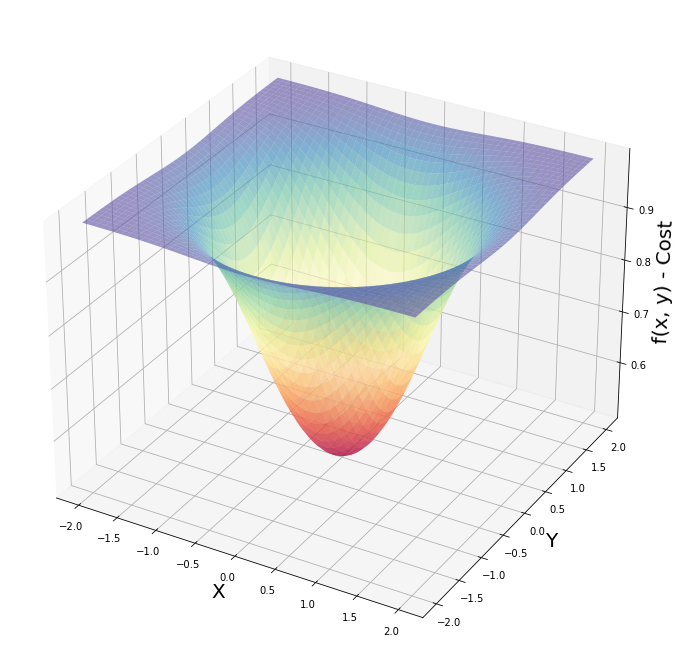

In [28]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
# gca = get current axis
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.Spectral, alpha=0.6)

plt.show()

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right)^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right)^2}$$

In [29]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative with respect to x is: ', diff(f(a, b), a))
print('Value of f(x, y) at x=1.8 y=1.0 is: ', f(a, b).evalf(subs={a:1.8, b:1.0})) #Python Dictionary
print('Value of partial derivative wrt x is: ', diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))


Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative with respect to x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wrt x is:  0.0368089716197505


## Batch Gradient Descent with Sympy

In [30]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs aty value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of:  0.000793898510134722
Minimum occurs aty value of:  0.000441054727852623
The cost is:  0.500000226534985


In [31]:
# Partial derivative functions example 4

def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [32]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs aty value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs aty value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [33]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs aty value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs aty value of:  1.9213255549212797e-11
The cost is:  0.5


C:\Users\migue\AppData\Local\Temp\ipykernel_12024\1268499281.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


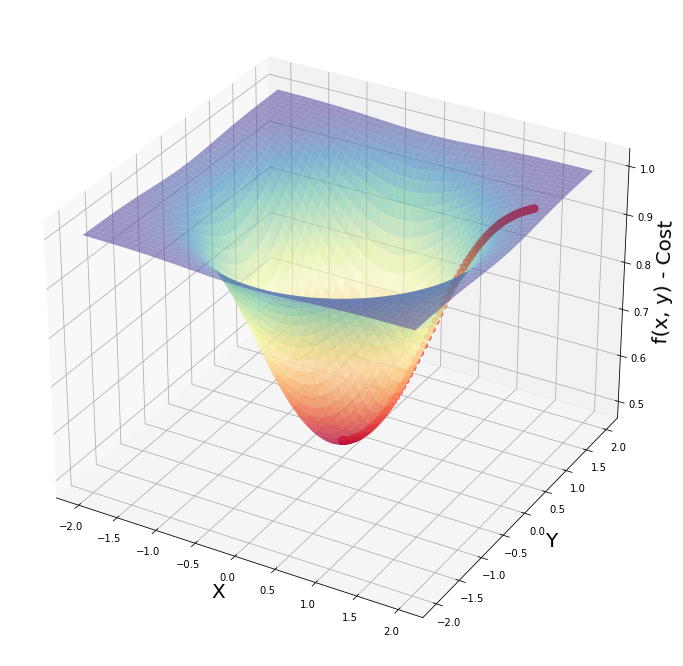

In [34]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
# gca = get current axis
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.Spectral, alpha=0.6)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='red'  )

plt.show()

In [35]:
# Advanced Numpy Array Practice

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black thought', 'MC'],['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]: ', hs_band[0] )
print('hs_band[0][1]: ', hs_band[1][0] )

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

# slicig arrays
print('Printing nicknaes...', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik', 'MC']], axis=0)
print('Printing band roles...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0]:  ['Black thought' 'MC']
hs_band[0][1]:  Questlove
[['Black thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknaes... ['Black thought' 'Questlove' 'Captain']
Printing band roles... ['MC' 'Drums' 'Guitar' 'MC']


# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems
## Residual Sum of Square: the base cost function to understand MSE

### $$RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2$$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2$$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y} \big)^2$$

In [36]:
# Make sample data

#fixing our arrays with two methods:
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Print shape of: ', x_5.shape)
print('Print shape of: ', y_5.shape)

Print shape of:  (7, 1)
Print shape of:  (7, 1)


In [37]:
# Quick linear regression
# Linear regression fails to work because of the given arrays that are only one dimension when 
# they must have at least two, we need to modify our arrays 
regr = LinearRegression()
regr.fit(x_5, y_5)

# printing interception and coeficient points:
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


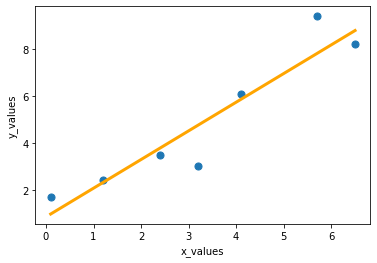

In [38]:
# plotting 
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.show()

In [39]:
# y_hat = Theta_0 + Theta_1*x
theta_0 = regr.intercept_[0]
theta_1 = regr.coef_[0][0]
# alternative formula: y_hat = theta_0 + theta_1*x_5
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5

print('Estimates values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Estimates values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [40]:
# Defining an MSE function
# function and print out the MSE for the y_hat calculated above

# with numpy
def mse(y, y_hat):
    return np.square(np.subtract(y, y_hat)).mean()

# with sklearn
def mse_(y, y_hat):
    return mean_squared_error(y_5, y_hat)

# manual solutions
def mse_m(y, y_hat):
    mse_calc = (1/y.size) * sum((y - y_hat)**2)
    return mse_calc
    

print(mse(y_5, y_hat))
print(mse_(y_5, y_hat))
print(mse_m(y_5, y_hat))

0.9479655759794577
0.9479655759794577
[0.94796558]


## 3D plot for the MSE cost function

### Make data for thetas

In [41]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1) 

### Calculating MSE using nested for loops

In [42]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        # print(plot_t0[i][j]), the order or i and j will affect how is shown, either row by column or the other way around
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
# plot_cost
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


C:\Users\migue\AppData\Local\Temp\ipykernel_12024\3380655557.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


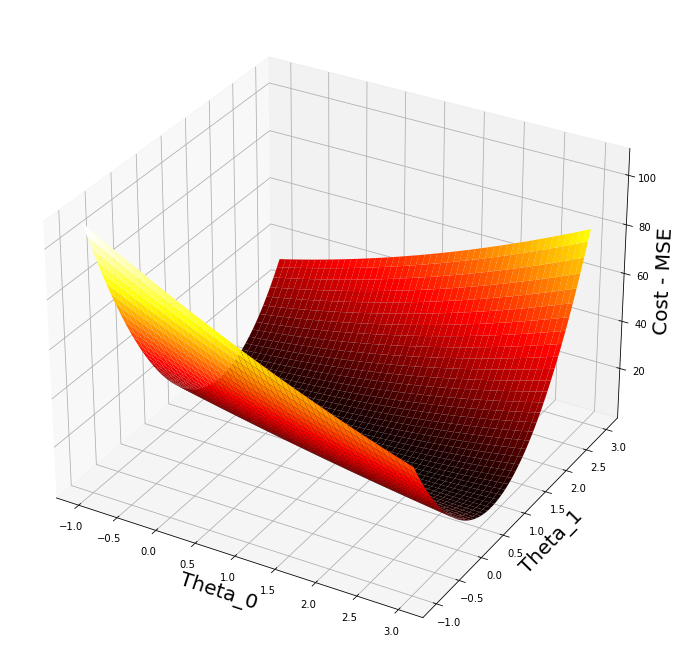

In [43]:
# Plotting MSE

fig= plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta_0', fontsize=20)
ax.set_ylabel('Theta_1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot )
plt.show()

In [44]:
print('Min value of plot cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)

print('Min occurs at (i, j):', ij_min)
print('Min MSE for Theta 0 at plot_0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_1[111][91]', plot_t1[111][91])

Min value of plot cost 0.9483826526747164
Min occurs at (i, j): (111, 91)
Min MSE for Theta 0 at plot_0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE} {\partial \theta_0} = -\frac {2}{n} \sum_{i=1}^{n} \big (y^{(i)}) - \theta_0 - \theta_1 x^{(i)} \big) $$

## $$\frac{\partial MSE} {\partial \theta_1} = -\frac {2}{n} \sum_{i=1}^{n} \big (y^{(i)}) - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big)$$

## MSE & Gradient Descent

In [45]:
# Imputs: x values, y values, array of theta parameters (theta_0 at index 0 and theta_1 at index 1)
def grad(x, y, thetas):
    n = y.size
    
    # Creating a theta0_slope and theta1_slope to hold slope valuesfrom partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    # Differents way to set an array with theta0_slope and theta1_slope
    return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    #return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [46]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = (y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas =  thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to out numpoy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 0:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 0: 1.2214935332607393
MSE is: 0.9479751138321334


C:\Users\migue\AppData\Local\Temp\ipykernel_12024\216720442.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


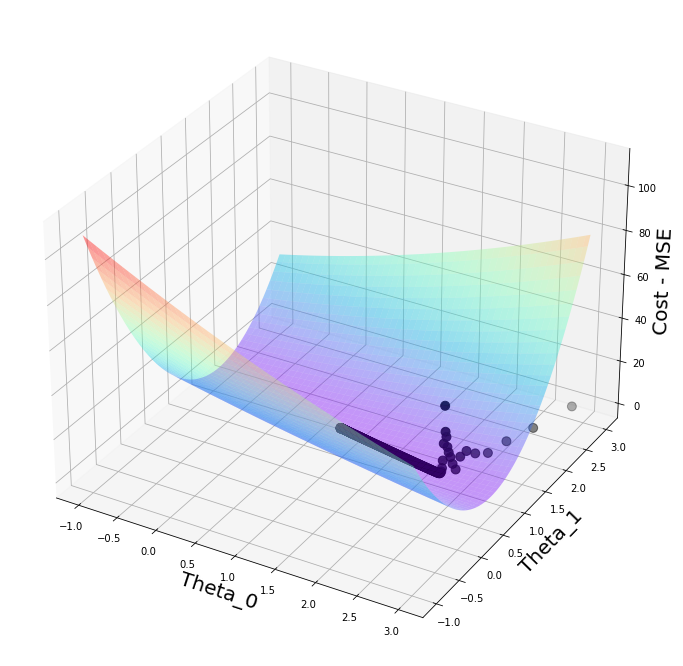

In [53]:
# Plotting MSE

fig= plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta_0', fontsize=20)
ax.set_ylabel('Theta_1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# make sure plot_vals and mse_vals have the same size, otherwise scatter plot won't be able to plot
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals[:1001], s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4 )
plt.show()

In [49]:
plot_vals.shape

(1001, 2)

In [50]:
mse_vals.shape

(1014,)